In [65]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

In [66]:
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)
image = X.to_numpy()

In [67]:
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [68]:
def save_model(model, filename):
    # save model
    pickle.dump(model, open("Models/" + filename, "wb"))
    
def load_model(filename):
    # load model
    return pickle.load(open("Models/" + filename, "rb"))

In [69]:
save_model(knn, "mnist_knn.pickle")

In [70]:
knn = load_model("mnist_knn.pickle")

In [71]:
y_pred = knn.predict(X_test)
y_pred_probs = knn.predict_proba(X_test)[:, 1]

In [72]:
def show_images():
    fig, axs = plt.subplots(2,3, figsize=(10,5))
    plt.subplots_adjust(hspace=0.5)
    for ax in axs.flat:
        idx = random.randint(0, len(X_test) + 1)
        ax.imshow((image[y_test.index[idx]].reshape(28,28)), 'gray')
        ax.set_title("Actual Value: {}\n Prediction: {}".format(y[y_test.index[idx]], y_pred[idx]), fontsize=10)

[[2060    1    1    0    0    1    5    1    0    2]
 [   0 2349    4    1    0    0    1    6    0    2]
 [  14   21 2010    6    4    0    4   31    6    1]
 [   1    4    8 2077    0   20    4   12   10    6]
 [   2   20    0    0 1966    0    7    6    1   45]
 [   6    4    2   13    0 1824   27    2    4   12]
 [   5    4    0    0    2   11 2040    0    1    0]
 [   2   23    4    1    2    1    0 2132    0   23]
 [   6   17    2   32    7   34    7    4 1917   22]
 [   7   11    1   18   19    0    2   20    9 2000]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2071
           1       0.96      0.99      0.98      2363
           2       0.99      0.96      0.97      2097
           3       0.97      0.97      0.97      2142
           4       0.98      0.96      0.97      2047
           5       0.96      0.96      0.96      1894
           6       0.97      0.99      0.98      2063
           7       0.96      0.97   

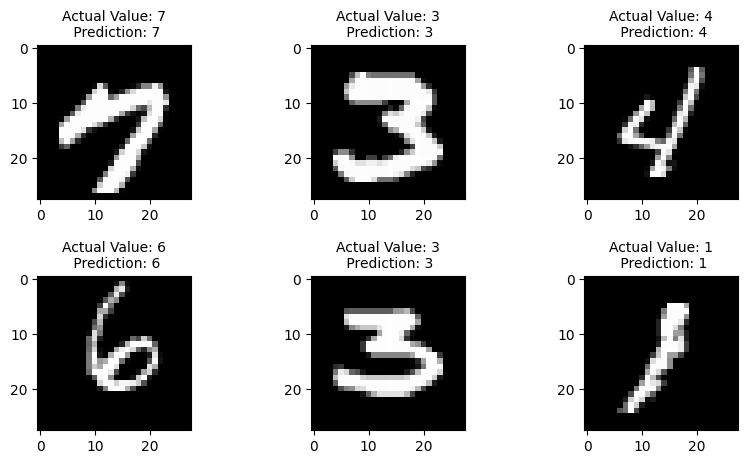

In [73]:
show_images()
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy : {}'.format(accuracy_score(y_test, y_pred)))
